# 0. Описание задачи

Набор данных предназначен для изучения и прогнозирования типов личности по методике Майерс-Бриггс (MBTI) на основе комбинации демографических факторов, сфер интересов и личностных оценок. Он включает в себя более 100 тысяч объектов, каждый из которых представляет человека с различными характеристиками, которые способствуют определению его типа MBTI. 


- `Age` - вещественное число, представляющее возраст человека.

- `Gender` -дкатегориальный признак, указывающий на пол человека, "Male" - 0, "Female" - 1.

- `Education` - бинарный признак. Значение 1 указывает на то, что человек имеет высшее образование, а 0 указывает на уровень средней школы или необразованность.

- `Interest` - категориальный признак, представляющий основную область интересов человека.

- `Introversion Score` - числовой признак, число в диапазоне от 0 до 10, представляющий склонность индивидуума к интроверсии по сравнению с экстраверсией. Более высокие баллы указывают на большую склонность к экстраверсии.

- `Sensing Score` - числовой признак, число в диапазоне от 0 до 10, представляющий предпочтение индивидуума в пользу восприятия по сравнению с интуицией. Более высокие баллы указывают на предпочтение сенсорики.

- `Thinking Score` - числовой признак, число в диапазоне от 0 до 10, указывающий на предпочтение индивидуума ипользовать мышление, а не полагаться на чувства. Более высокие баллы указывают на выбор в пользу мышления.

- `Judging Score` - числовой признак, число в диапазоне от 0 до 10, представляющий предпочтение индивидуума в суждении по сравнению с восприятием. Более высокие баллы указывают на предпочтение судейства.

- `Personality` - цель, содержащая тип личности. личности «Люди»

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns          
import sklearn   
%matplotlib inline

# 1. Загружаем данные

In [5]:
data = pd.read_csv('jupyter_lab/data.csv')

Размер таблицы - количество строк и количество столбцов

In [7]:
data.shape

(128061, 9)

Первые 5 строк таблицы:

In [9]:
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


Последние 5 строк таблицы:

In [11]:
data.tail()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ
128060,27.0,Male,0,7.78827,4.770737,3.18600,6.204355,Others,ENFJ


Признак `Education` - бинарный, `Gender`, `Personality` и `Interest` - номинальный (категориальный), остальные признаки - количественныe (числовые).

Названия столбцов:

In [14]:
data.columns

Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest', 'Personality'],
      dtype='object')

Названия строк:

In [16]:
data.index

RangeIndex(start=0, stop=128061, step=1)

In [17]:
data['Gender']

0           Male
1         Female
2         Female
3           Male
4         Female
           ...  
128056      Male
128057      Male
128058    Female
128059      Male
128060      Male
Name: Gender, Length: 128061, dtype: object

In [18]:
data['Interest']

0            Unknown
1             Sports
2            Unknown
3             Others
4         Technology
             ...    
128056          Arts
128057       Unknown
128058          Arts
128059       Unknown
128060        Others
Name: Interest, Length: 128061, dtype: object

Данные столбцы имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [20]:
data['Personality']

0         ENFP
1         ESFP
2         ENFP
3         INTP
4         ENFP
          ... 
128056    ESTP
128057    INFP
128058    ENFP
128059    ENFJ
128060    ENFJ
Name: Personality, Length: 128061, dtype: object

In [21]:
data['Gender'] = data['Gender'].astype('category')

In [22]:
data['Interest'] = data['Interest'].astype('category')

In [23]:
data['Personality'] = data['Personality'].astype('category')

In [24]:
data['Gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False, categories_dtype=object)

In [25]:
data['Interest'].dtype

CategoricalDtype(categories=['Arts', 'Others', 'Sports', 'Technology', 'Unknown'], ordered=False, categories_dtype=object)

In [26]:
data['Personality'].dtype

CategoricalDtype(categories=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ',
                  'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP',
                  'ISTJ', 'ISTP'],
, ordered=False, categories_dtype=object)

# 2. Визуализируем данные

Сводную информацию о признаках можем получить, вызвав метод describe:

In [29]:
data.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.
Получим информацию о категориальных признаках:

In [31]:
data.describe(include=['category'])

,Gender,Interest,Personality
count,128061,128061,128061
unique,2,5,16
top,Male,Unknown,ENFP
freq,70432,48835,34404


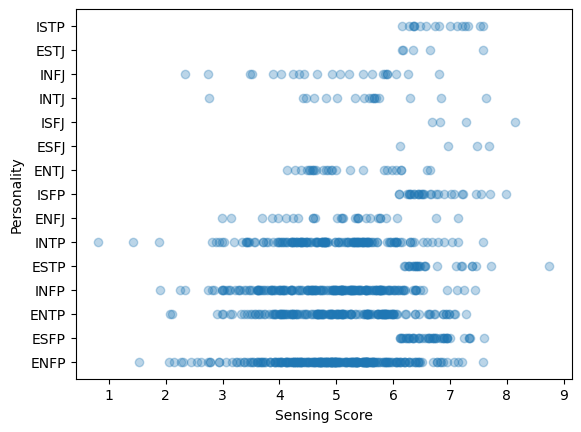

In [32]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['Sensing Score'], data.iloc[random_subset]['Personality'], alpha = .3)
plt.xlabel('Sensing Score')
plt.ylabel('Personality')
pass

Точки сгущаются по середине для 4 типов: `INTP`, `INFP`, `ENTP`, `ENFP`. Эти 4 типа не полагаются на что-то одно, а используют и восприятие, и интуицию. А, например, высокие баллы у типов `ESFP`, `ESTP`, `ISFP`, `ISTP` указывают на предпочтение сенсорики у этих людей.

Нарисуем диаграмму рассеивания для признаков `Sensing Score` и `Age`

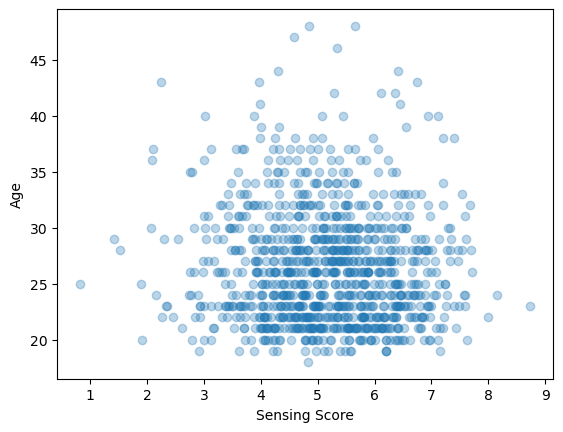

In [34]:
plt.scatter(data.iloc[random_subset]['Sensing Score'], data.iloc[random_subset]['Age'], alpha = .3)
plt.xlabel('Sensing Score')
plt.ylabel('Age')
pass

Видим, что все люди в основном используют и чувства, и интуицию вместе, почти нет людей, которые полагаются только на что-то одно.

Построим все возможные диаграммы рассеивания для каждой пары переменных. В диаграмме цвет маркеров соответствует типу личности `Personality`.

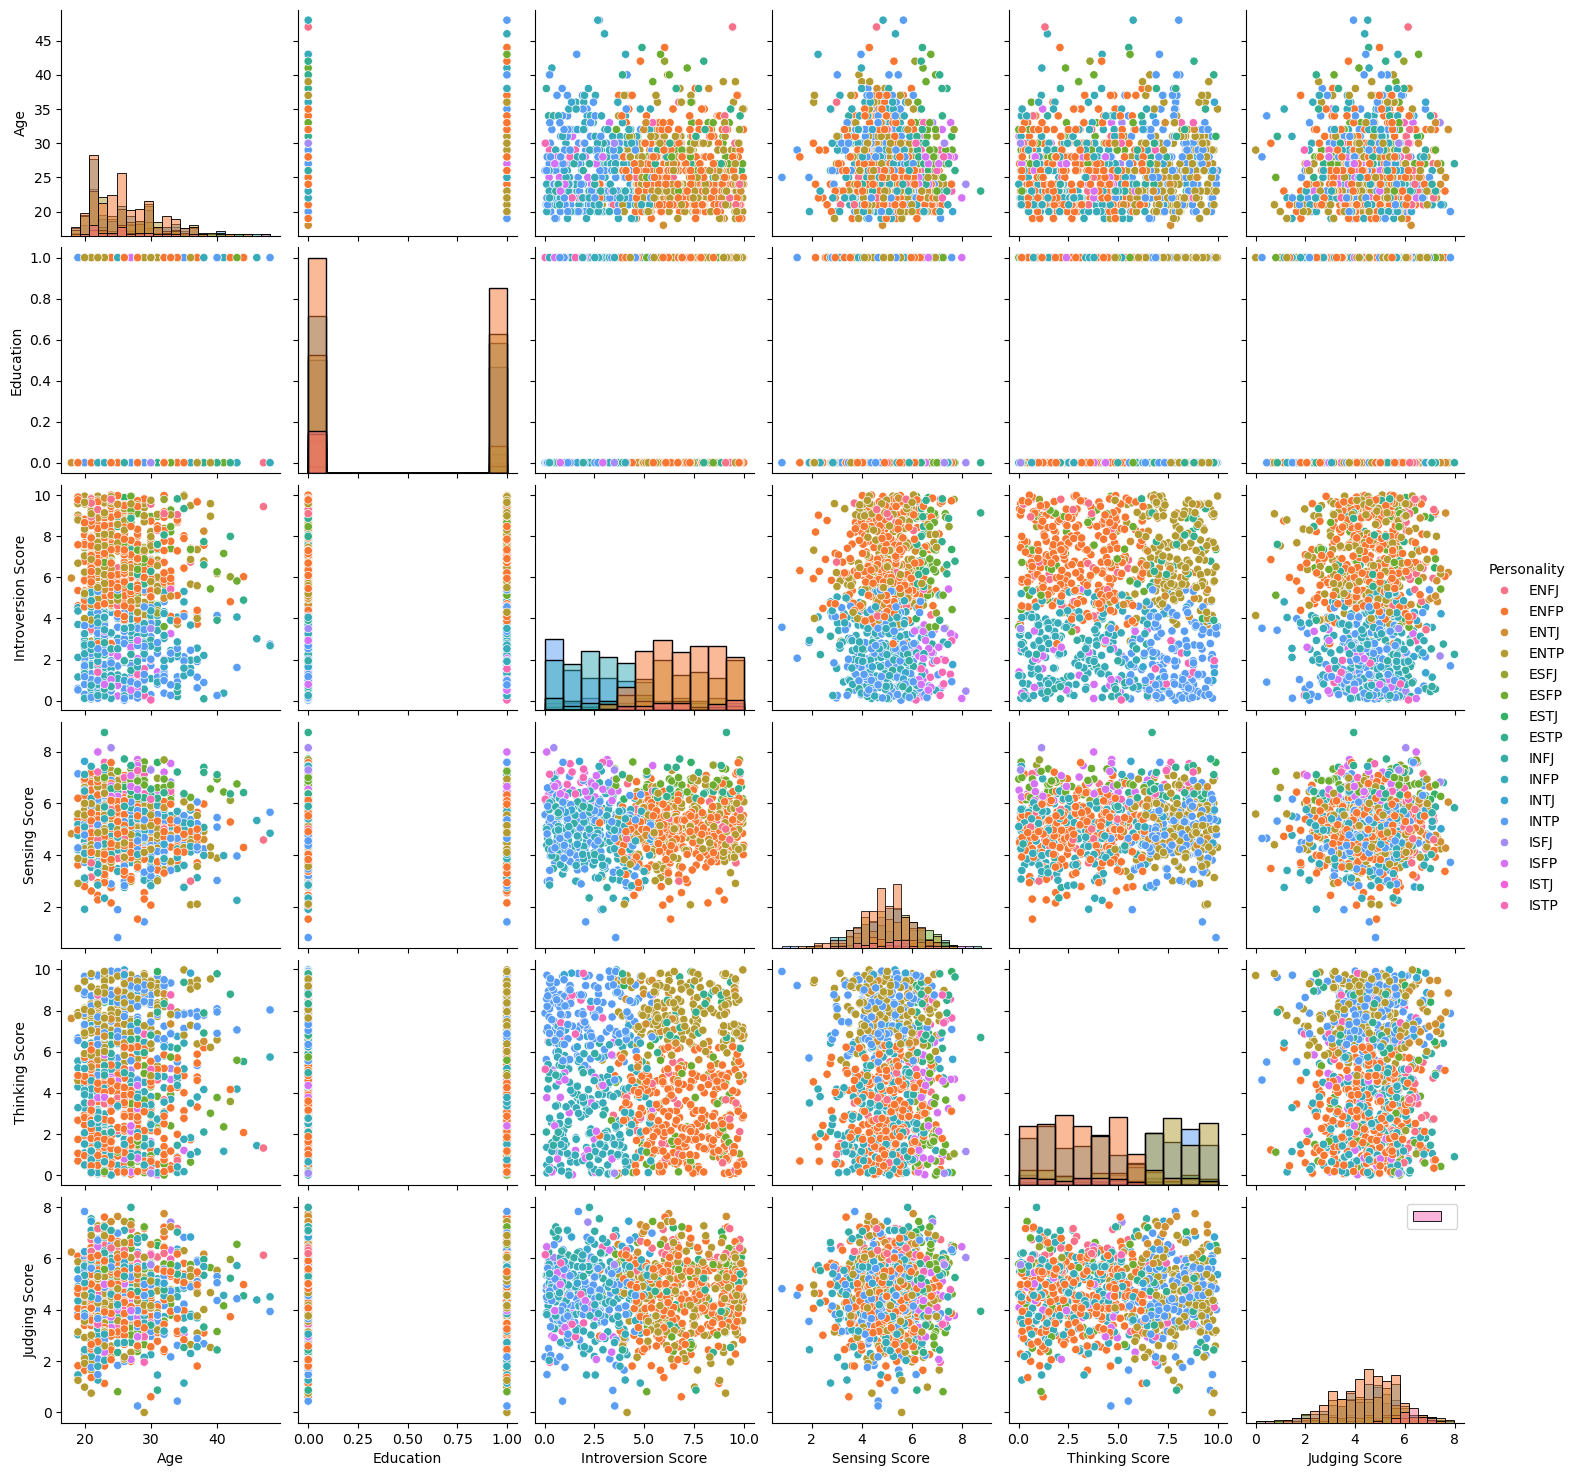

In [36]:
sns.pairplot(data.iloc[random_subset], hue='Personality', diag_kind='hist')
plt.legend([''])
pass

На диагонали расположены гистограммы распределения признаков.

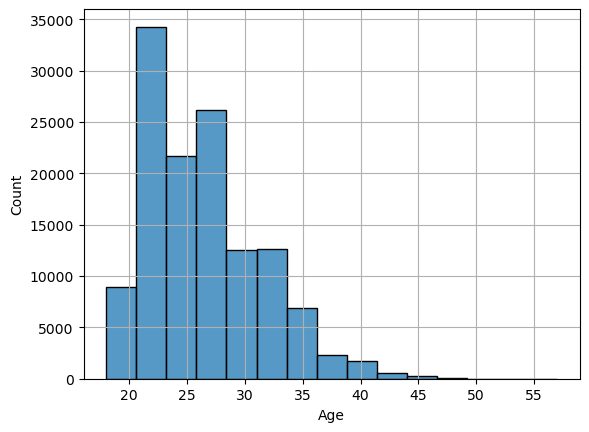

In [38]:
sns.histplot(data['Age'], bins=15)
plt.grid()
pass

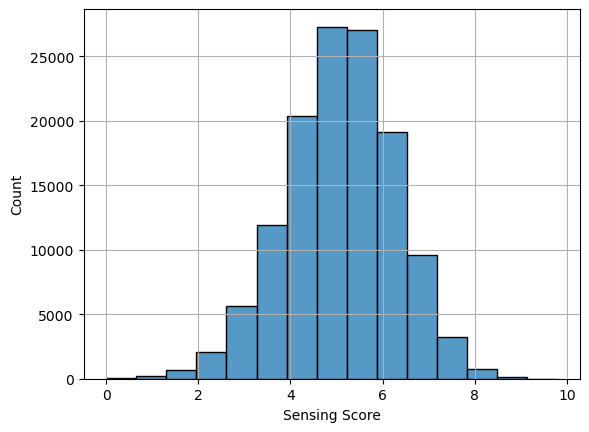

In [39]:
sns.histplot(data['Sensing Score'], bins=15)
plt.grid()
pass

Строим ящик с усами. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения. Аналогично нижний ус - продолжается вниз до минимального значения. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

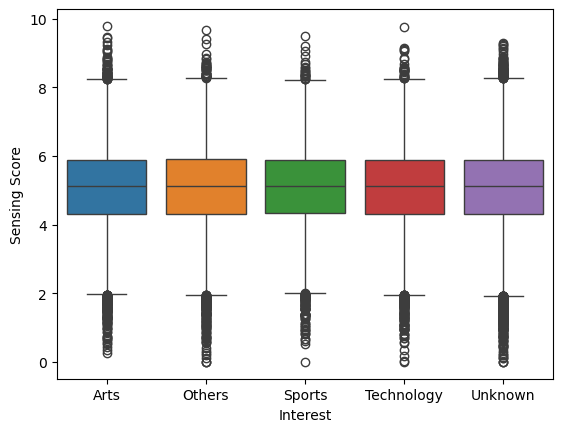

In [41]:
sns.boxplot(x="Interest", y="Sensing Score", hue = "Interest", data=data)
pass

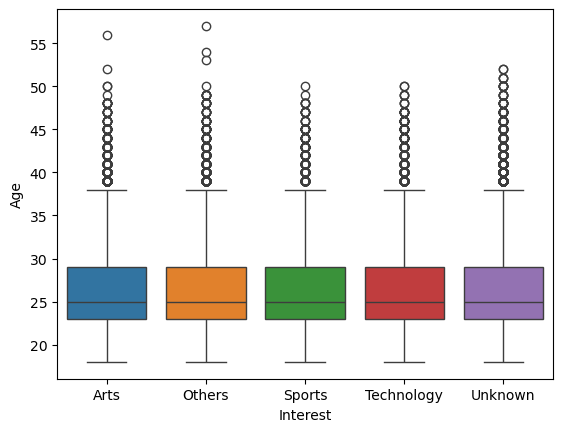

In [42]:
sns.boxplot(x="Interest", y="Age", hue = "Interest", data=data)
pass

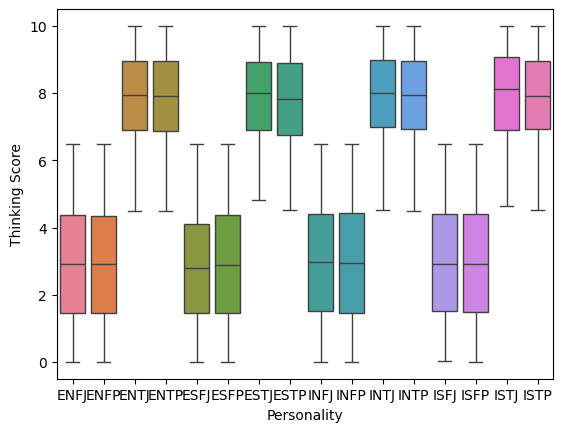

In [43]:
sns.boxplot(x="Personality", y="Thinking Score", hue = "Personality", data=data)
pass

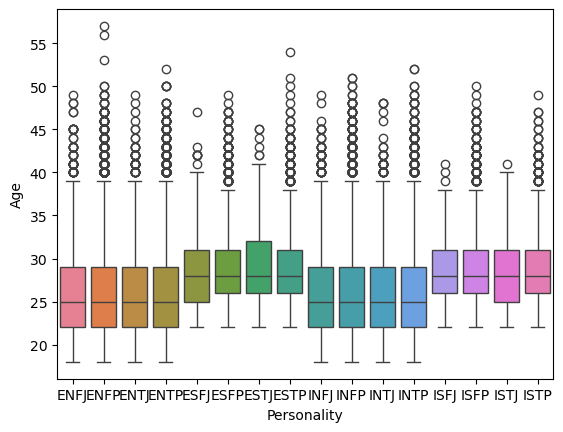

In [44]:
sns.boxplot(x="Personality", y="Age", hue = "Personality", data=data)
pass

Строим скрипичные графики (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

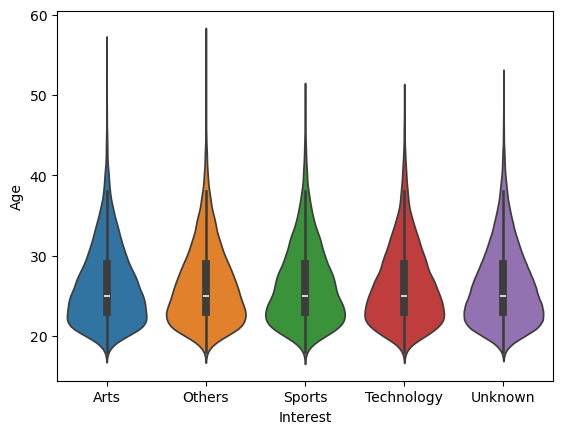

In [46]:
sns.violinplot(x="Interest", y="Age", hue = "Interest", data=data)
pass

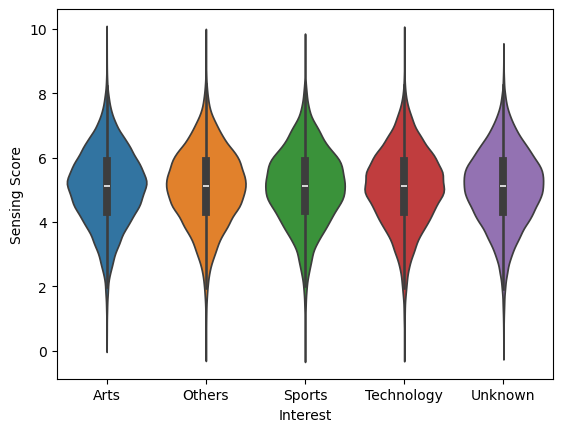

In [47]:
sns.violinplot(x="Interest", y="Sensing Score", hue = "Interest", data=data)
pass

Вычислим матрицу корреляции для количественных признаков:

In [49]:
corr_mat = data.loc[:, ~data.columns.isin(['Personality', 'Gender', 'Interest'])].corr()
corr_mat

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
Age,1.000000,0.003564,-0.000937,-0.003234,0.001176,0.000412
Education,0.003564,1.000000,-0.002352,-0.003643,0.002747,0.000794
Introversion Score,-0.000937,-0.002352,1.000000,-0.000502,0.002818,0.000653
Sensing Score,-0.003234,-0.003643,-0.000502,1.000000,-0.000781,-0.001879
Thinking Score,0.001176,0.002747,0.002818,-0.000781,1.000000,0.002091
Judging Score,0.000412,0.000794,0.000653,-0.001879,0.002091,1.000000


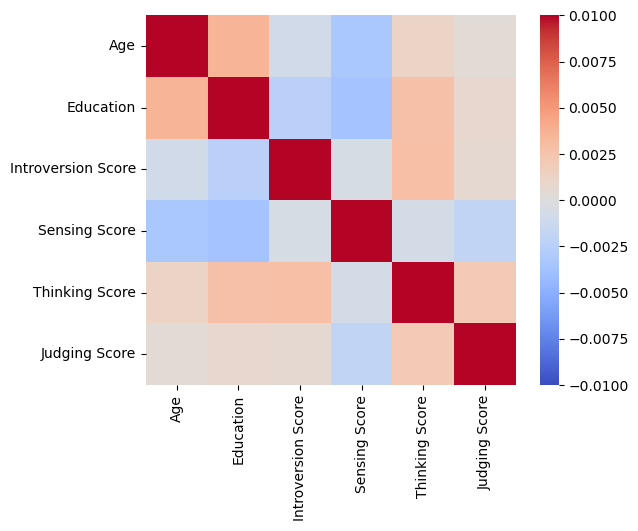

In [50]:
sns.heatmap(corr_mat, square=True, vmin = -0.01, vmax = 0.01, cmap='coolwarm')
pass

Данные не коррелируются между собой, значения не зависят друг от друга.

In [52]:
data['Gender'].value_counts() 

Gender
Male      70432
Female    57629
Name: count, dtype: int64

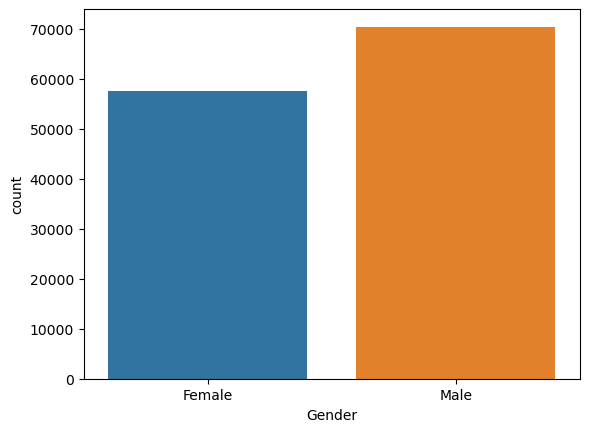

In [53]:
sns.countplot(x='Gender', hue = 'Gender', data=data)
pass

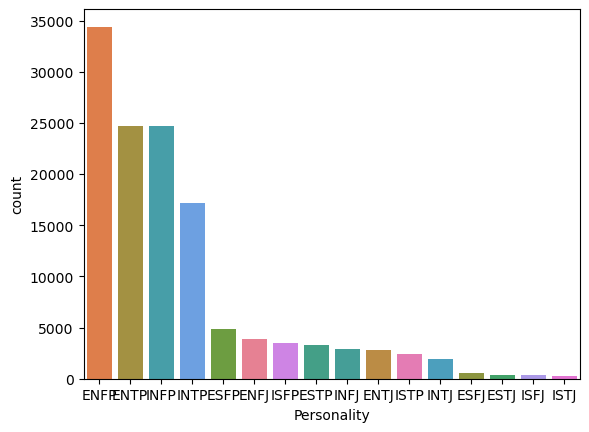

In [54]:
sns.countplot(x='Personality', order=data['Personality'].value_counts().index, hue = 'Personality', data=data)
pass

# 3. Обработываем пропущенные значения

Пропущенные значения в таблице представлены значениями `Unknown`.

In [57]:
Ind_unknown = data[data['Interest'] == 'Unknown'].index
data.loc[Ind_unknown, 'Interest'] = np.nan

In [58]:
data.isna().sum() 

Age                       0
Gender                    0
Education                 0
Introversion Score        0
Sensing Score             0
Thinking Score            0
Judging Score             0
Interest              48835
Personality               0
dtype: int64

In [59]:
data = data.drop(Ind_unknown)
data.shape

(79226, 9)

In [60]:
data.describe(include=['category'])

,Gender,Interest,Personality
count,79226,79226,79226
unique,2,4,16
top,Male,Arts,ENFP
freq,43634,25489,20635


In [61]:
data['Interest'].value_counts() 

Interest
Arts          25489
Others        21733
Technology    19103
Sports        12901
Unknown           0
Name: count, dtype: int64

# 4. Обработка категориальных признаков

Категориальный признак `Gender` закодируем с помощью числовых признаков. Это бинарный признак поэтому `Male` - 0, `Female` - 1.

In [64]:
data['Gender'] = pd.factorize(data['Gender'])[0]

К категориальным (небинарным) признакам `Interest` и `Personality` применим метод бинаризации.

Признак `Interest` принимает 4 значений: `Arts`, `Others`, `Sports`, `Technology`.

Вместо него используем 4 новых признаков, которые так и назовем `Arts`, `Others`, `Sports`, `Technology`. При этом
если признак `Interest` принимает значение `Arts`, то признак `Arts` равен 1, а все остальные 0;
если признак `Interest` принимает значение `Others`, то признак 'Others' равен 1, а все остальные 0
и так далее.

In [66]:
Interest_dummies = pd.get_dummies(data['Interest'])
Interest_dummies.head()

,Arts,Others,Sports,Technology,Unknown
1,False,False,True,False,False
3,False,True,False,False,False
4,False,False,False,True,False
5,False,True,False,False,False
7,False,False,True,False,False


In [67]:
Interest_dummies = Interest_dummies.drop(['Unknown'], axis = 1)

In [68]:
Interest_dummies

,Arts,Others,Sports,Technology
1,False,False,True,False
3,False,True,False,False
4,False,False,False,True
5,False,True,False,False
7,False,False,True,False
...,...,...,...,...
128054,False,False,False,True
128055,False,False,False,True
128056,True,False,False,False
128058,True,False,False,False


In [69]:
data = pd.concat((data, Interest_dummies), axis=1)
data = data.drop(['Interest'], axis=1)

In [70]:
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Arts,Others,Sports,Technology
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,ESFP,False,False,True,False
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,INTP,False,True,False,False
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,ENFP,False,False,False,True
5,25.0,1,0,7.66292,5.758030,1.97014,4.563907,ENFP,False,True,False,False
7,27.0,0,0,5.24958,5.963290,1.16176,5.873350,ENFJ,False,False,True,False


In [71]:
Personality_dummies = pd.get_dummies(data['Personality'])
Personality_dummies.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
data = pd.concat((data, Personality_dummies), axis=1)
data = data.drop(['Personality'], axis=1)

In [73]:
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Arts,Others,Sports,...,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,25.0,1,0,7.66292,5.758030,1.97014,4.563907,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,27.0,0,0,5.24958,5.963290,1.16176,5.873350,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# 5. Проводим нормализацию

Нормализуем количественные признаки с помощью стандартизации - линейного преобразования, приводящего все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:езнаков:

In [76]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [77]:
data_stand.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Arts,Others,Sports,...,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
1,0.131760,-1.107219,-0.834902,0.298032,0.910472,-1.444107,-0.255090,-0.688711,-0.614822,2.267379,...,-0.0566,-0.165894,-0.15814,-0.480702,-0.129362,-0.395832,-0.055809,-0.166896,-0.04705,-0.138824
3,0.335676,0.903152,-0.834902,-1.032670,-0.220237,0.808435,1.013178,-0.688711,1.626466,-0.441032,...,-0.0566,-0.165894,-0.15814,-0.480702,-0.129362,2.526290,-0.055809,-0.166896,-0.04705,-0.138824
4,1.967000,-1.107219,1.197731,1.707886,-0.278224,0.118347,0.072402,-0.688711,-0.614822,-0.441032,...,-0.0566,-0.165894,-0.15814,-0.480702,-0.129362,-0.395832,-0.055809,-0.166896,-0.04705,-0.138824
5,-0.276071,0.903152,-0.834902,0.925735,0.570250,-1.040559,-0.009009,-0.688711,1.626466,-0.441032,...,-0.0566,-0.165894,-0.15814,-0.480702,-0.129362,-0.395832,-0.055809,-0.166896,-0.04705,-0.138824
7,0.131760,-1.107219,-0.834902,0.088333,0.743895,-1.320668,0.931842,-0.688711,-0.614822,2.267379,...,-0.0566,-0.165894,-0.15814,-0.480702,-0.129362,-0.395832,-0.055809,-0.166896,-0.04705,-0.138824


# 6. Разбиваем данные на обучающую и тестовую выборки.

Для предсказания цены квартиры будем использовать все входные признаки.

In [80]:
data_stand.columns

Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Arts', 'Others', 'Sports',
       'Technology', 'ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ',
       'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype='object')

In [81]:
X = data_stand.drop(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ',
       'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], axis=1)

In [82]:
y = pd.concat((data['ENFJ'], data['ENFP'], data['ENTJ'], data['ENTP'], data['ESFJ'], data['ESFP'], data['ESTJ'],
              data['ESTP'], data['INFJ'], data['INFP'], data['INTJ'], data['INTP'], data['ISFJ'], 
               data['ISFP'], data['ISTJ'], data['ISTP']), axis = 1)
y

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128054,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
128055,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
128056,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
128058,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(59419, 19807)

# 7. Обучаем модель

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [87]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [88]:
err_test

0.02366587570050992

Ошибка на тестовой выборке: 0.02366587570050992 с параметром k = 10

In [90]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.2357157992105814 3


In [91]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.012628536326764167 0.025290932498611602


Оптимальное значение гиперпараметра = 3

Ошибка на обучающей выборке: 0.012628536326764167 с параметром k = 3

Ошибка на тестовой выборке: 0.025290932498611602 с параметром k = 3

In [93]:
from sklearn.metrics import accuracy_score
     
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_test_pred)}')

Accuracy on training set: 0.87840589710362
Accuracy on test set: 0.7680617963346291


# 8. Выводы

Модель демонстрирует маленькую ошибку и точность 87%, что говорит о том, что она хорошо справляется с задачей классификации и правильно предсказывает классы для большинства примеров. В ходе выполнения работы строки со значениями типа `Unknown` были удалены. По матрице корреляции видим, что признаки почти не зависят друг от друга. Категориальный признак `Gender` закодировали с помощью 0 и 1, а к признакам `Personality` и `Interest` применили метод бинаризации. 